## Impoting relevant libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import time
from builtins import zip
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Conv2D, Input, MaxPool2D, Conv2DTranspose, concatenate, Lambda, BatchNormalization, Activation, LeakyReLU, ReLU
from keras.utils import img_to_array, load_img, plot_model
from keras.optimizers import Adam
from keras.initializers import RandomNormal
!pip install scikit-image

In [4]:
from zipfile import ZipFile
with ZipFile("/content/drive/MyDrive/EDI_TY-02/archive (1).zip", 'r') as z:
  z.extractall("Data")

In [5]:
path = "/content/Data/maps/maps/train/"
num_images = 100

combined_images = sorted(glob(path + "*.jpg"))[:num_images]

images = np.zeros(shape=(len(combined_images), 256, 256, 3))
masks = np.zeros(shape=(len(combined_images), 256, 256, 3))

for idx, path in enumerate(combined_images):

    combined_image = tf.cast(img_to_array(load_img(path)), tf.float32)

    image = combined_image[:,:600,:]
    mask = combined_image[:,600:,:]

    images[idx] = (tf.image.resize(image,(256,256)))/255
    masks[idx] = (tf.image.resize(mask,(256,256)))/255


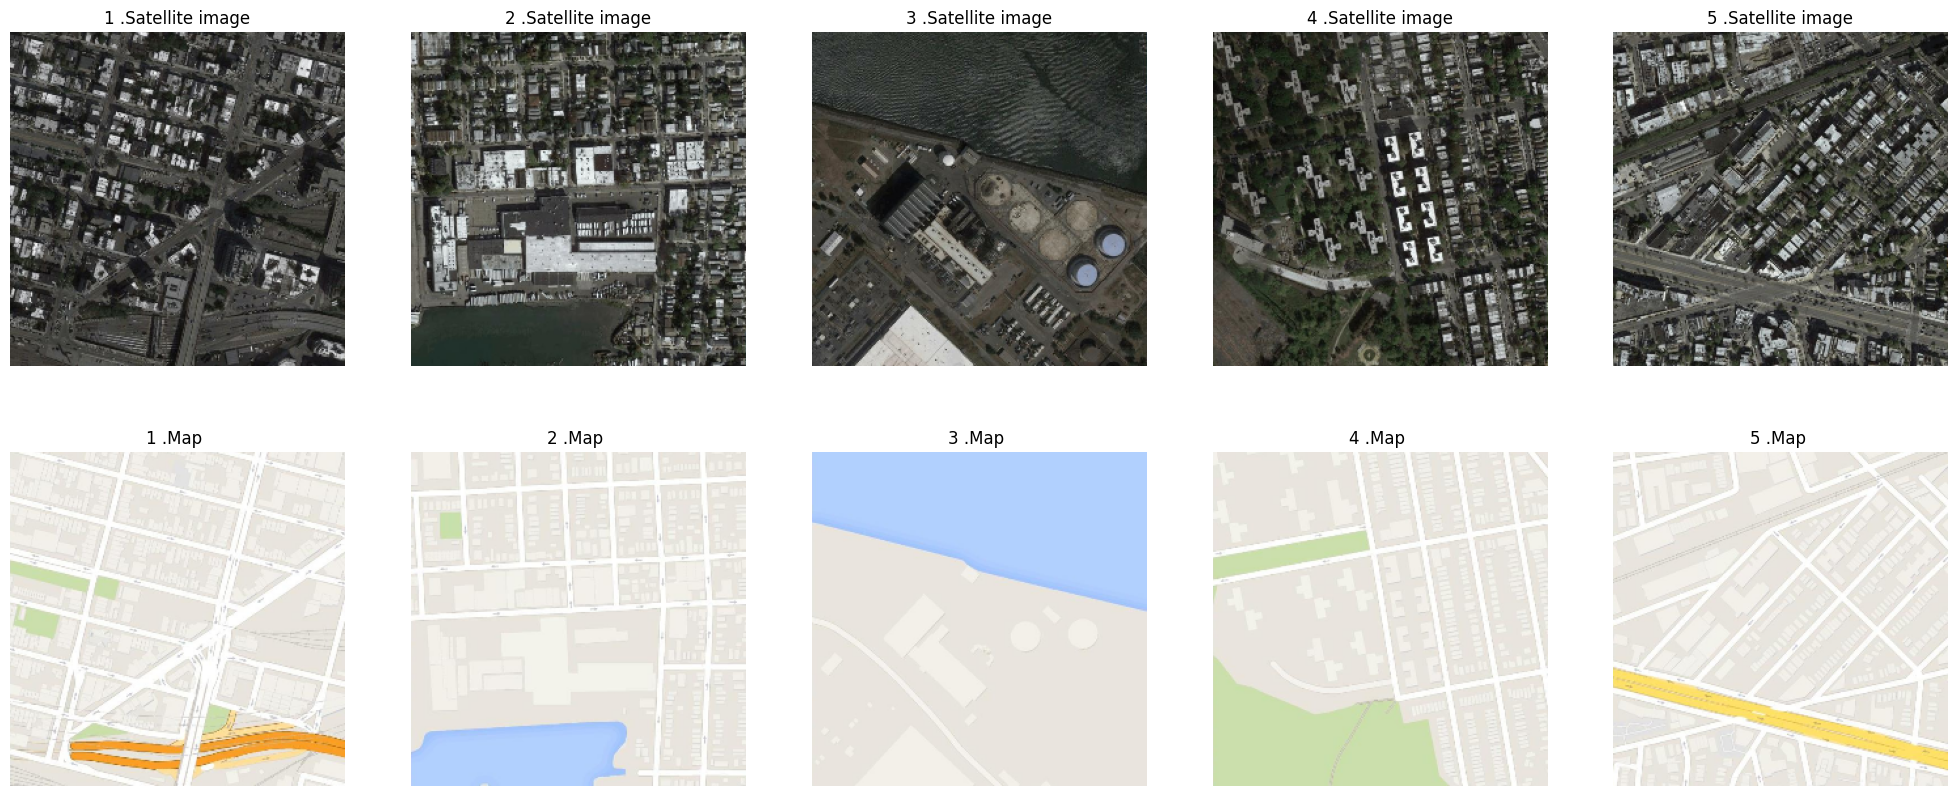

In [6]:
plt.figure(figsize=(25,10))
for i in range(1,6):
    idx = np.random.randint(1,100)
    image, mask = images[idx], masks[idx]
    plt.subplot(2,5,i)
    plt.imshow(image)
    plt.title(str(i) + " .Satellite image")
    plt.axis("off")

    plt.subplot(2,5,i + 5)
    plt.imshow(mask)
    plt.title(str(i) + " .Map ")
    plt.axis("off")
plt.show()

In [7]:
print(f"Number of images: {len(images)}")
print(f"Number of masks: {len(masks)}")

Number of images: 100
Number of masks: 100


In [8]:
print(images.shape)
print(masks.shape)

(100, 256, 256, 3)
(100, 256, 256, 3)


In [3]:
# Common
import os
import keras
import numpy as np
from tqdm import tqdm
from glob import glob
import tensorflow as tf
import tensorflow.image as tfi

# Data
from keras.preprocessing.image import load_img, img_to_array

# Data Viz
import matplotlib.pyplot as plt

# Model
from keras.layers import ReLU
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import ZeroPadding2D
from keras.layers import LeakyReLU
from keras.layers import concatenate
from keras.layers import Conv2DTranspose

from keras.initializers import RandomNormal
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model, load_model

# Model Viz
from tensorflow.keras.utils import plot_model

# Model Losses
from keras.losses import BinaryCrossentropy

In [7]:
def load_data(path, trim=None):
    paths = sorted(glob(path + "*.jpg"))

    if trim is not None:
        paths = sorted(glob(path + "*.jpg"))[:trim]

    images = np.zeros(shape=(len(paths), 256, 256, 3))
    masks = np.zeros(shape=(len(paths), 256, 256, 3))

    for i,path in tqdm(enumerate(paths), desc="Data"):
        image = tf.cast(img_to_array(load_img(path)), tf.float32)
        img = image[:,:600,:]
        mask = image[:,600:,:]
        images[i] = tfi.resize(img,(256,256))/255.
        masks[i] = tfi.resize(mask,(256,256))/255.
    return images, masks

In [8]:
def show_image(image, title=None, alpha=1.0):
    plt.imshow(image, alpha=alpha)
    if title is not None:
        plt.title(title)
    plt.axis('off')

def show_mask(image, mask, alpha=0.4, title=None):
    image = tf.squeeze(tf.cast(image, tf.float32))
    mask = tf.squeeze(tf.cast(mask, tf.float32))
    show_image(image)
    show_image(mask, alpha=alpha, title=title)

In [9]:
path = "/content/Data/maps/maps/train/"
dataset = load_data(path, trim=1000)

Data: 1000it [00:20, 49.08it/s]


In [10]:
BATCH_SIZE = 32
data = tf.data.Dataset.from_tensor_slices(dataset).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:GPU:0}} slice index 8 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

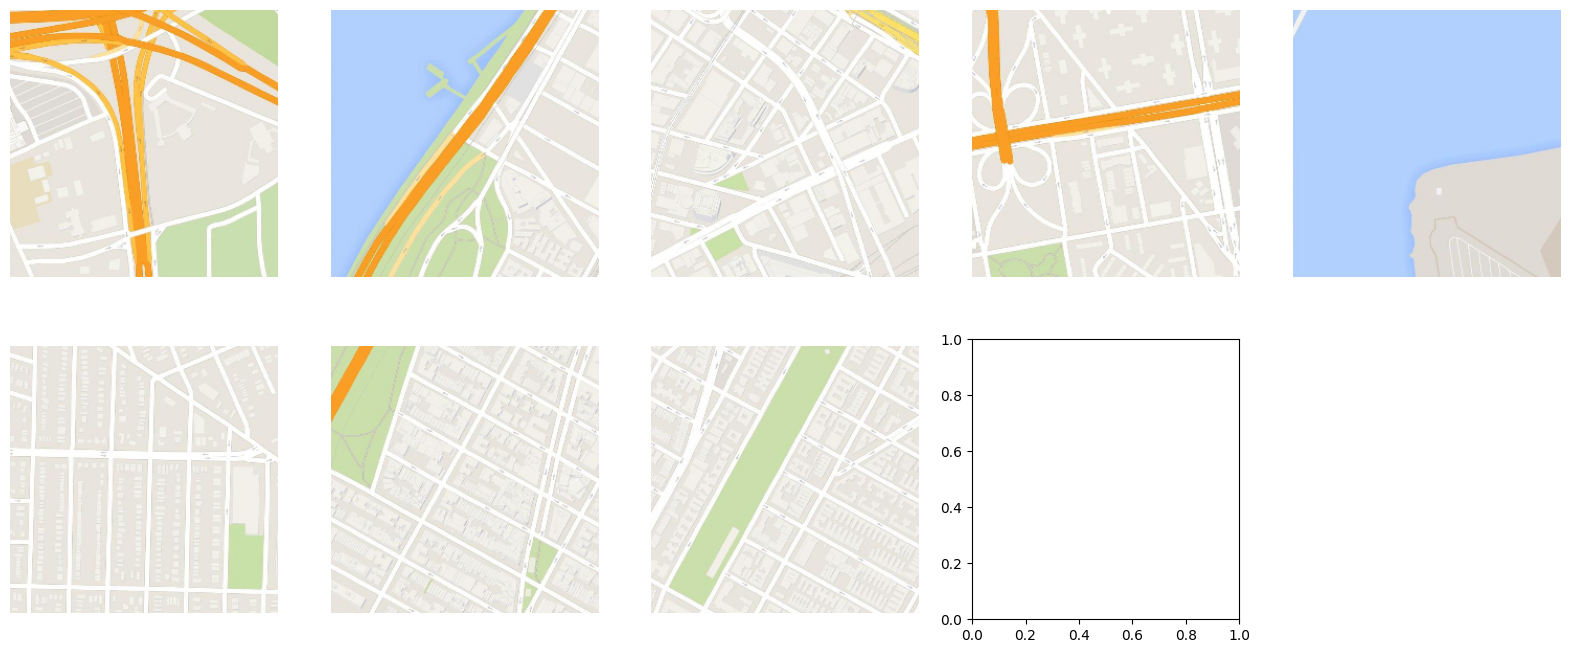

In [14]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    for image, mask in data.take(1):
        show_image(mask[i])
plt.show()

In [ ]:
pip install keras-tuner

In [ ]:
#  #Path for training and validation data
# train_path = "/content/Data/maps/train/"
# val_path = "/content/Data/maps/val/"

# # Load data
# train_data = load_data(train_path, trim=10)
# val_data = load_data(val_path, trim=10)  # Adjust trim as needed




In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization, LeakyReLU, ReLU, Dropout, concatenate, ZeroPadding2D
# from kerastuner.tuners import RandomSearch
# from kerastuner.engine.hyperparameters import HyperParameters
# from tensorflow.keras.optimizers import Adam
# import numpy as np
# from tensorflow.keras.preprocessing.image import img_to_array, load_img
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# from tqdm import tqdm
# from glob import glob
# import tensorflow.image as tfi

# def load_data(path, trim=None):
#     paths = sorted(glob(path + "*.jpg"))

#     if trim is not None:
#         paths = sorted(glob(path + "*.jpg"))[:trim]

#     images = np.zeros(shape=(len(paths), 256, 256, 3))
#     masks = np.zeros(shape=(len(paths), 256, 256, 3))

#     for i, path in tqdm(enumerate(paths), desc="Data"):
#         image = tf.cast(img_to_array(load_img(path)), tf.float32)
#         img = image[:, :600, :]
#         mask = image[:, 600:, :]
#         images[i] = tfi.resize(img, (256, 256)) / 255.
#         masks[i] = tfi.resize(mask, (256, 256)) / 255.
#     return images, masks

# def downsample(filters, size, batch_norm=True, conv_filters=None, conv_kernel=None, conv_strides=None):
#     layer = tf.keras.Sequential()
#     layer.add(Conv2D(filters, kernel_size=size, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False))
#     if batch_norm:
#         layer.add(BatchNormalization())
#     layer.add(LeakyReLU())

#     if conv_filters is not None and conv_kernel is not None and conv_strides is not None:
#         layer.add(Conv2D(filters=conv_filters, kernel_size=conv_kernel, strides=conv_strides, padding='same', kernel_initializer='he_normal', use_bias=False))
#         if batch_norm:
#             layer.add(BatchNormalization())
#         layer.add(LeakyReLU())

#     return layer

# def upsample(filters, size, dropout=False, conv_transpose_filters=None, conv_transpose_kernel=None, conv_transpose_strides=None):
#     layer = tf.keras.Sequential()
#     layer.add(Conv2DTranspose(filters, kernel_size=size, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False))
#     layer.add(BatchNormalization())
#     if dropout:
#         layer.add(Dropout(0.5))
#     layer.add(ReLU())

#     if conv_transpose_filters is not None and conv_transpose_kernel is not None and conv_transpose_strides is not None:
#         layer.add(Conv2DTranspose(filters=conv_transpose_filters, kernel_size=conv_transpose_kernel, strides=conv_transpose_strides, padding='same', kernel_initializer='he_normal', use_bias=False))
#         layer.add(BatchNormalization())
#         layer.add(ReLU())

#     return layer

# def Generator(hp=None):
#     inputs = Input(shape=(256, 256, 3))
#     down_stack = [
#         downsample(64, 4, batch_norm=False),  # (bs, 128,128,64)
#         downsample(128, 4),  # (bs, 64,64,128)
#         downsample(256, 4),  # (bs, 32,32,256)
#         downsample(512, 4),  # (bs, 16,16,512)
#         downsample(512, 4),  # (bs, 8,8,512)
#         downsample(512, 4),  # (bs, 4,4,512)
#         downsample(512, 4),  # (bs, 2,2,512)
#         downsample(512, 4),  # (bs, 1,1,512)
#     ]

#     up_stack=[
#         upsample(512, 4, dropout=True),
#         upsample(512, 4, dropout=True),
#         upsample(512, 4, dropout=True),
#         upsample(512, 4),
#         upsample(256, 4),
#         upsample(128, 4),
#         upsample(64, 4),
#     ]

#     initializer = tf.random_normal_initializer(0., 0.02)
#     last = Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh', kernel_initializer=initializer)

#     x = inputs
#     skips =[]
#     for down in down_stack:
#         x = down(x)
#         skips.append(x)

#     skips = reversed(skips[:-1])
#     for up, skip in zip(up_stack, skips):
#         x = up(x)
#         x = concatenate([x, skip])

#     x = last(x)
#     return Model(inputs=inputs, outputs=x)

# def build_model(hp):
#     model = Generator(hp)
#     model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
#     return model

# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=5,
#     executions_per_trial=3,
#     directory='my_dir',
#     project_name='gan_tuning')

# # Load Data
# images, masks = load_data("/content/Data/maps/val/", trim=100)  # Specify your data path here
# X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

# tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# # Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# print(f"Optimal learning rate: {best_hps.get('learning_rate')}")
# for key, value in best_hps.values.items():
#     print(f"{key}: {value}")


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization, LeakyReLU, ReLU, Dropout, concatenate, ZeroPadding2D
# from kerastuner.tuners import RandomSearch
# from kerastuner.engine.hyperparameters import HyperParameters
# from tensorflow.keras.optimizers import Adam
# import numpy as np
# from tensorflow.keras.preprocessing.image import img_to_array, load_img
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# from tqdm import tqdm
# from glob import glob
# import tensorflow.image as tfi

# def load_data(path, trim=None):
#     paths = sorted(glob(path + "*.jpg"))

#     if trim is not None:
#         paths = sorted(glob(path + "*.jpg"))[:trim]

#     images = np.zeros(shape=(len(paths), 256, 256, 3))
#     masks = np.zeros(shape=(len(paths), 256, 256, 3))

#     for i, path in tqdm(enumerate(paths), desc="Data"):
#         image = tf.cast(img_to_array(load_img(path)), tf.float32)
#         img = image[:, :600, :]
#         mask = image[:, 600:, :]
#         images[i] = tfi.resize(img, (256, 256)) / 255.
#         masks[i] = tfi.resize(mask, (256, 256)) / 255.
#     return images, masks

# def downsample(filters, size, batch_norm=True):
#     layer = tf.keras.Sequential()
#     layer.add(Conv2D(filters, kernel_size=size, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False))
#     if batch_norm:
#         layer.add(BatchNormalization())
#     layer.add(LeakyReLU())
#     return layer

# def upsample(filters, size, dropout=False):
#     layer = tf.keras.Sequential()
#     layer.add(Conv2DTranspose(filters, kernel_size=size, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False))
#     layer.add(BatchNormalization())
#     if dropout:
#         layer.add(Dropout(0.5))
#     layer.add(ReLU())
#     return layer

# def Generator(hp=None):
#     inputs = Input(shape=(256, 256, 3))
#     down_stack = [
#         downsample(hp.Int(f'filters_{i}', min_value=16, max_value=512, step=16),
#                    hp.Int(f'kernel_size_{i}', min_value=3, max_value=7, step=2),
#                    batch_norm=False if i == 0 else True)
#         for i in range(8)
#     ]

#     up_stack=[
#         upsample(hp.Int(f'filters_{i}', min_value=16, max_value=512, step=16),
#                  hp.Int(f'kernel_size_{i}', min_value=3, max_value=7, step=2),
#                  dropout=True if i < 3 else False)
#         for i in range(7)
#     ]

#     initializer = tf.random_normal_initializer(0., 0.02)
#     last = Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh', kernel_initializer=initializer)

#     x = inputs
#     skips =[]
#     for down in down_stack:
#         x = down(x)
#         skips.append(x)

#     skips = reversed(skips[:-1])
#     for up, skip in zip(up_stack, skips):
#         x = up(x)
#         x = concatenate([x, skip])

#     x = last(x)
#     return Model(inputs=inputs, outputs=x)

# def build_model(hp):
#     model = Generator(hp)
#     model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')),
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
#     return model

# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=5,
#     executions_per_trial=3,
#     directory='my_dir',
#     project_name='gan_tuning')

# # Load Data
# images, masks = load_data("/content/Data/maps/val/", trim=10)  # Specify your data path here
# X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

# tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# # Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# print(f"Optimal learning rate: {best_hps.get('learning_rate')}")
# for key, value in best_hps.values.items():
#     print(f"{key}: {value}")


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization, LeakyReLU, ReLU, Dropout, concatenate, ZeroPadding2D
# from kerastuner.tuners import RandomSearch
# from kerastuner.engine.hyperparameters import HyperParameters
# from tensorflow.keras.optimizers import Adam
# import numpy as np
# from tensorflow.keras.preprocessing.image import img_to_array, load_img
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# from tqdm import tqdm
# from glob import glob
# import tensorflow.image as tfi

# def load_data(path, trim=None):
#     paths = sorted(glob(path + "*.jpg"))

#     if trim is not None:
#         paths = sorted(glob(path + "*.jpg"))[:trim]

#     images = np.zeros(shape=(len(paths), 256, 256, 3))
#     masks = np.zeros(shape=(len(paths), 256, 256, 3))

#     for i, path in tqdm(enumerate(paths), desc="Data"):
#         image = tf.cast(img_to_array(load_img(path)), tf.float32)
#         img = image[:, :600, :]
#         mask = image[:, 600:, :]
#         images[i] = tfi.resize(img, (256, 256)) / 255.
#         masks[i] = tfi.resize(mask, (256, 256)) / 255.
#     return images, masks

# def downsample(filters, size, batch_norm=True):
#     layer = tf.keras.Sequential()
#     layer.add(Conv2D(filters, kernel_size=size, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False))
#     if batch_norm:
#         layer.add(BatchNormalization())
#     layer.add(LeakyReLU())
#     return layer

# def upsample(filters, size, dropout=False):
#     layer = tf.keras.Sequential()
#     layer.add(Conv2DTranspose(filters, kernel_size=size, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False))
#     layer.add(BatchNormalization())
#     if dropout:
#         layer.add(Dropout(0.5))
#     layer.add(ReLU())
#     return layer

# def Generator(hp=None):
#     inputs = Input(shape=(256, 256, 3))
#     down_stack = [
#         downsample(hp.Int(f'filters_{i}', min_value=128, max_value=1024, step=64),
#                    hp.Int(f'kernel_size_{i}', min_value=3, max_value=7, step=2),
#                    batch_norm=False if i == 0 else True)
#         for i in range(8)
#     ]

#     up_stack=[
#         upsample(hp.Int(f'filters_{i}', min_value=128, max_value=1024, step=64),
#                  hp.Int(f'kernel_size_{i}', min_value=3, max_value=7, step=2),
#                  dropout=True if i < 3 else False)
#         for i in range(7)
#     ]

#     initializer = tf.random_normal_initializer(0., 0.02)
#     last = Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh', kernel_initializer=initializer)

#     x = inputs
#     skips =[]
#     for down in down_stack:
#         x = down(x)
#         skips.append(x)

#     skips = reversed(skips[:-1])
#     for up, skip in zip(up_stack, skips):
#         x = up(x)
#         x = concatenate([x, skip])

#     x = last(x)
#     return Model(inputs=inputs, outputs=x)

# def build_model(hp):
#     model = Generator(hp)
#     model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')),
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
#     return model

# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=5,
#     executions_per_trial=3,
#     directory='my_diwrqr1111',
#     project_name='gan_tuninggq345ggg')

# # Load Data
# images, masks = load_data("/content/Data/maps/val/", trim=10)  # Specify your data path here
# X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

# tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# # Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# print(f"Optimal learning rate: {best_hps.get('learning_rate')}")
# for key, value in best_hps.values.items():
#     print(f"{key}: {value}")


In [ ]:
# # Define tuner
# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=5,  # Adjust as needed
#     directory='tuner_result13s',
#     project_name='generator_tunnssddg')

# # Start the search for best hyperparameters
# tuner.search(train_data[0], train_data[1], validation_data=(val_data[0], val_data[1]), epochs=10, batch_size=32)

# # Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f'Best Learning Rate: {best_hps.get("learning_rate")}')

# # Retrieve the best model.
# best_model = tuner.get_best_models(num_models=1)[0]

In [15]:
def downsample(filters, size, batch_norm=True):

    layer = Sequential()
    layer.add(Conv2D(filters, kernel_size=size, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False))
    if batch_norm:
        layer.add(BatchNormalization())
    layer.add(LeakyReLU())

    return layer

In [16]:
def upsample(filters, size, dropout=False):
    layer = Sequential()
    layer.add(Conv2DTranspose(filters, kernel_size=size, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False))
    layer.add(BatchNormalization())
    if dropout:
        layer.add(Dropout(0.5))
    layer.add(ReLU())
    return layer

In [17]:
def Generator():
    inputs = Input(shape=(256, 256, 3))
    down_stack = [
        downsample(64, 4, batch_norm=False), # (bs, 128,128,64)
        downsample(128, 4), # (bs, 64,64,128)
        downsample(256, 4), # (bs, 32,32,256)
        downsample(512, 4), # (bs, 16,16,512)
        downsample(512, 4), # (bs, 8,8,512)
        downsample(512, 4), # (bs, 4,4,512)
        downsample(756, 4), # (bs, 2,2,512)
        downsample(980, 4), # (bs, 2,2,512)
        # downsample(980, 4), # (bs, 1,1,512)
    ]

    up_stack=[
        # upsample(980, 4,dropout=True),

        upsample(980, 4,dropout=True),
        upsample(756, 4,dropout=True),
        upsample(512, 4,dropout=True),
        upsample(512, 4),
        upsample(256, 4),
        upsample(256, 4,dropout=True),
        upsample(128, 4),
        upsample(64, 4),
    ]

    initializer = tf.random_normal_initializer(0.,0.02)
    last = Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh', kernel_initializer=initializer)


    x = inputs
    skips =[]
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = concatenate([x, skip])

    x = last(x)
    return Model(inputs=inputs, outputs=x)

In [18]:
generator = Generator()
generator.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 128, 128, 64)         3072      ['input_1[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 64, 64, 128)          131584    ['sequential[0][0]']          
                                                                                                  
 sequential_2 (Sequential)   (None, 32, 32, 256)          525312    ['sequential_1[0][0]']        
                                                                                              

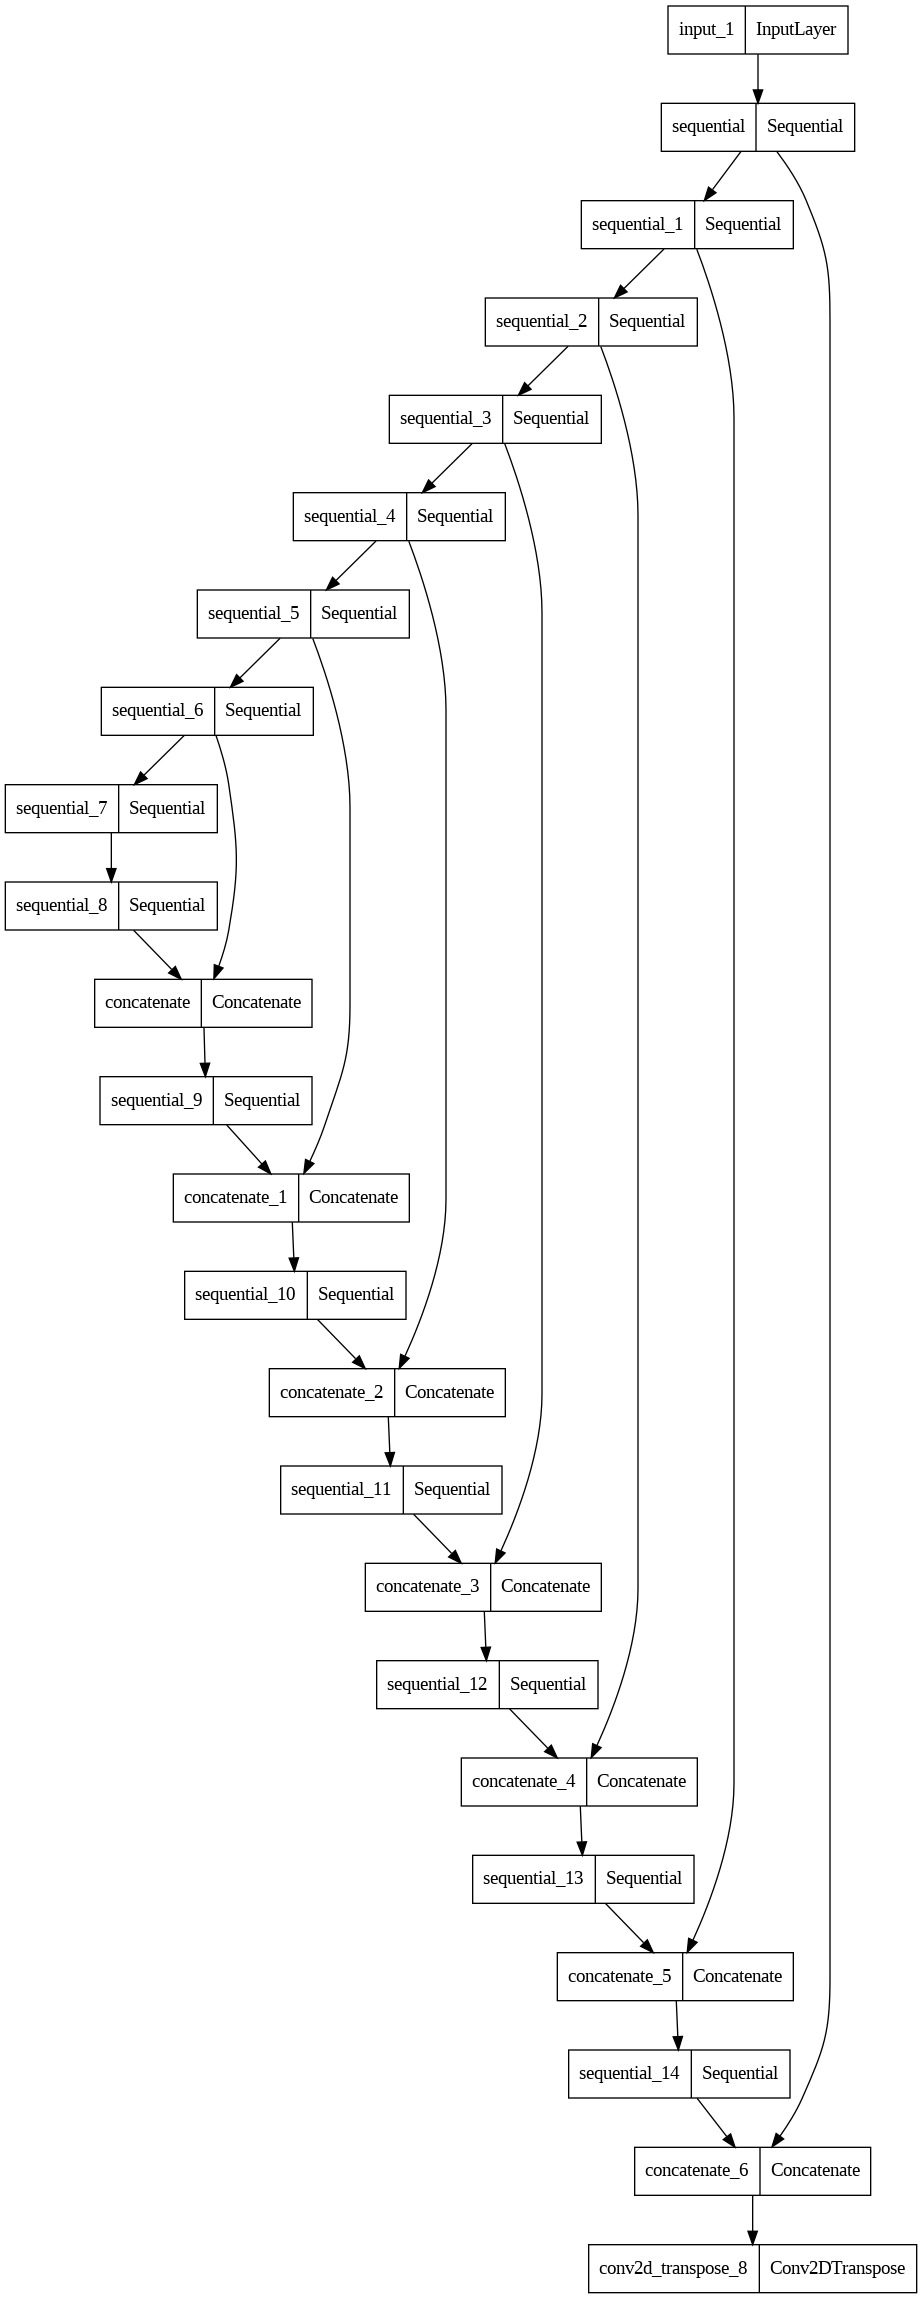

In [19]:
plot_model(generator)

In [20]:
def Discriminator():

    init = tf.random_normal_initializer(0.,0.02)

    inp = Input(shape=(256, 256, 3), name='input_image')
    tar = Input(shape=(256, 256, 3), name='target_image')

    x = concatenate([inp, tar])
    x = downsample(64, 4, batch_norm=False)(x)
    x = downsample(128, 4)(x)
    x = downsample(128, 4)(x)
    x = downsample(256, 4)(x)

    x = ZeroPadding2D()(x)
    x = Conv2D(512, 4, strides=1, kernel_initializer=init, use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = ZeroPadding2D()(x)

    x = Conv2D(1, 4, kernel_initializer=init)(x)
    return Model(inputs=[inp, tar], outputs=[x])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image (InputLayer)    [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 target_image (InputLayer)   [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 concatenate_7 (Concatenate  (None, 256, 256, 6)          0         ['input_image[0][0]',         
 )                                                                   'target_image[0][0]']        
                                                                                                  
 sequential_16 (Sequential)  (None, 128, 128, 64)         6144      ['concatenate_7[0][0]'] 

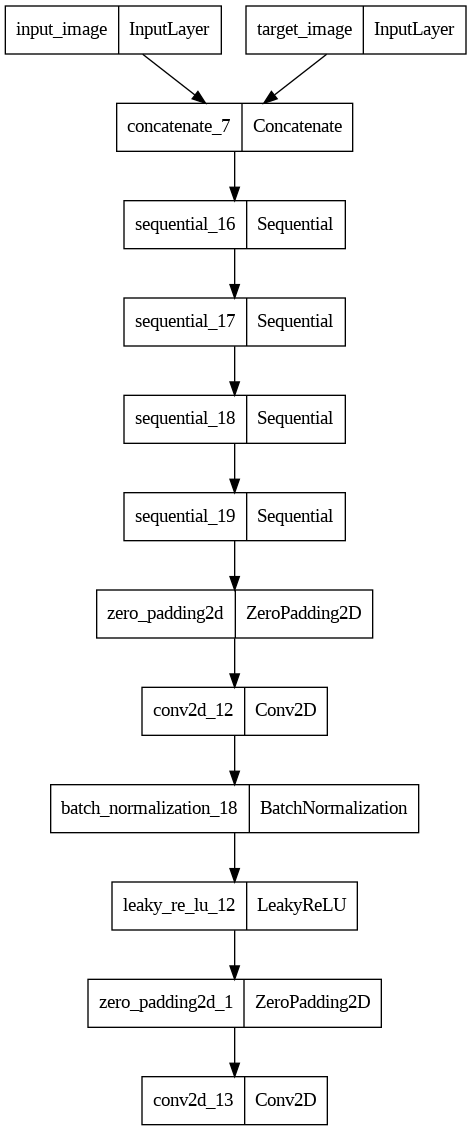

In [21]:
discriminator = Discriminator()
discriminator.summary()
plot_model(discriminator)

In [22]:
loss_object = BinaryCrossentropy(from_logits=True)
generator_optimizer = Adam(learning_rate=2e-4, beta_1=0.5)
discriminator_optimizer = Adam(learning_rate=2e-4, beta_1=0.5)

In [23]:
def generator_loss(disc_generated_output, gen_output, target):

    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    # Mean Absolute Error
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    total_gen_loss = gan_loss + (100 * l1_loss)
    return total_gen_loss, gan_loss, l1_loss

In [24]:
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    gen_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

    total_loss = real_loss + gen_loss
    return total_loss

In [25]:
@tf.function()
def train_step(input_image, target_image, epoch):
    input_image, target_image = tf.cast(input_image, tf.float32), tf.cast(target_image, tf.float32)
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        dis_real_output = discriminator([input_image, target_image], training=True)
        dis_gen_output = discriminator([input_image, gen_output], training=True)

        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(dis_gen_output, gen_output, target_image)
        dis_loss = discriminator_loss(dis_real_output, dis_gen_output)

    generator_grads = gen_tape.gradient(gen_total_loss, generator.trainable_variables)
    discriminator_grads = disc_tape.gradient(dis_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_grads, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_grads, discriminator.trainable_variables))

In [26]:
def fit(train_ds, epoch):
    for i in tqdm(range(epoch), desc='Epoch'):
        # train
        for n,(input_image, target_image) in train_ds.enumerate():
            train_step(input_image, target_image, i)

In [27]:
def show_predictions(image, mask):
    pred_out = generator.predict(image)[0]
    mask = mask[0]
    image = image[0]

    plt.figure(figsize=(8,5))

    plt.subplot(1,2,1)
    show_image(mask, title="Original Mask")

    plt.subplot(1,2,2)
    show_image(pred_out, title="Predicted Mask")

    plt.tight_layout()

In [ ]:
fit(data, 20)
n_images = 10
for image, mask in data.take(n_images):
    show_predictions(image, mask)
    plt.show()

Epoch:  35%|███▌      | 7/20 [06:19<11:16, 52.03s/it]

In [5]:
generator = load_model('/content/drive/MyDrive/EDI_TY-02/Pix2PixMapGenerator.h5')

1/1 [==============================] - 4s 4s/step


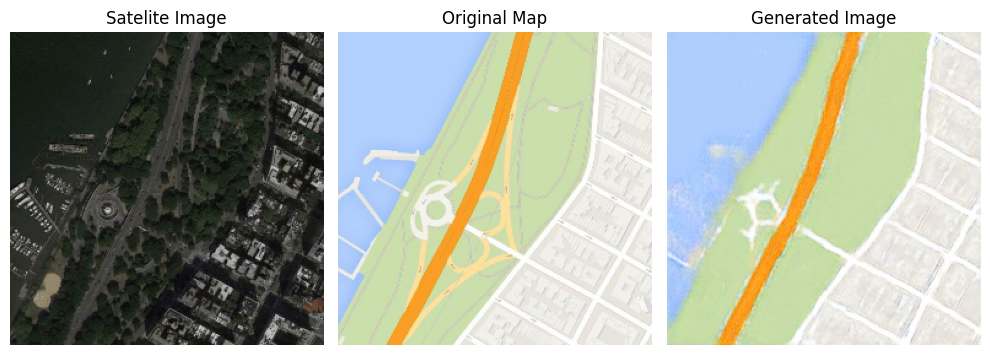

1/1 [==============================] - 0s 147ms/step


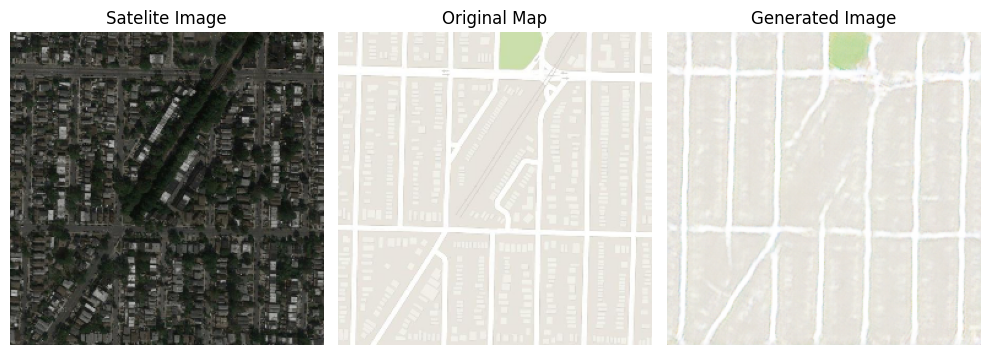

1/1 [==============================] - 0s 20ms/step


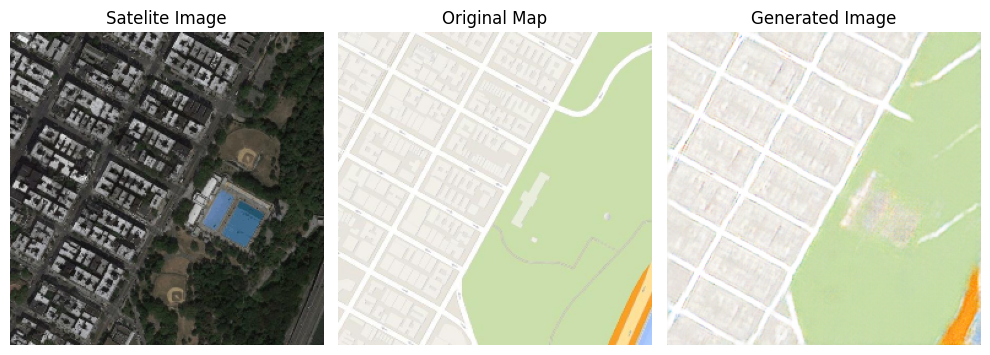

1/1 [==============================] - 0s 20ms/step


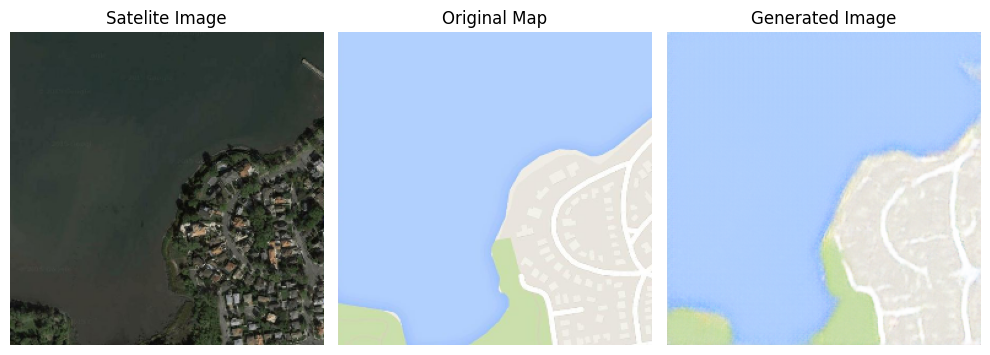

1/1 [==============================] - 0s 40ms/step


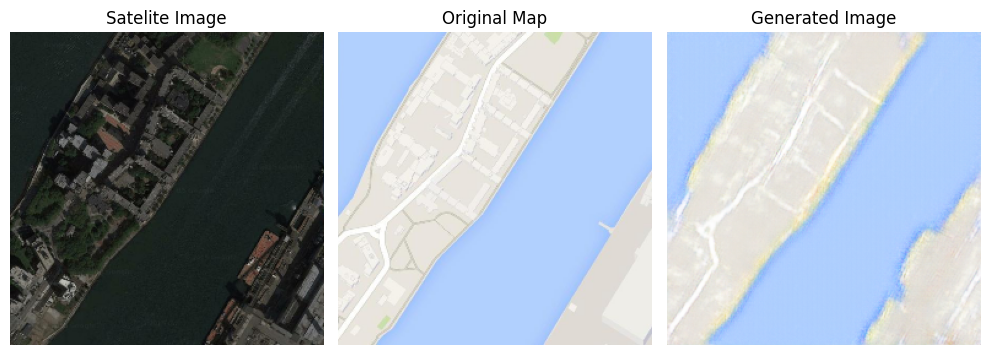

1/1 [==============================] - 0s 20ms/step


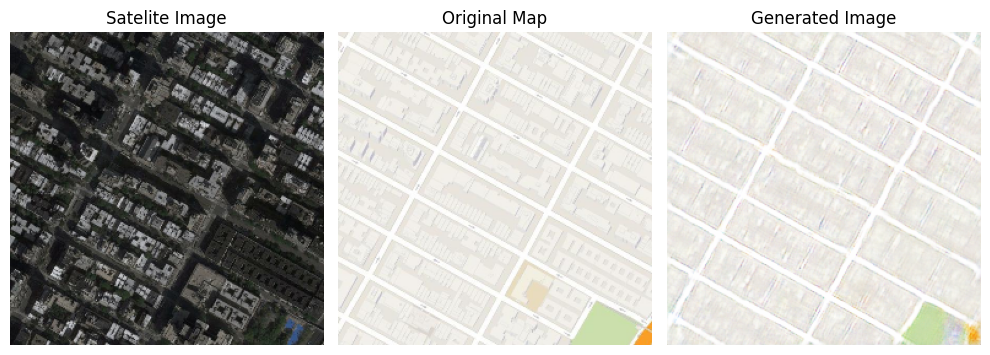

1/1 [==============================] - 0s 34ms/step


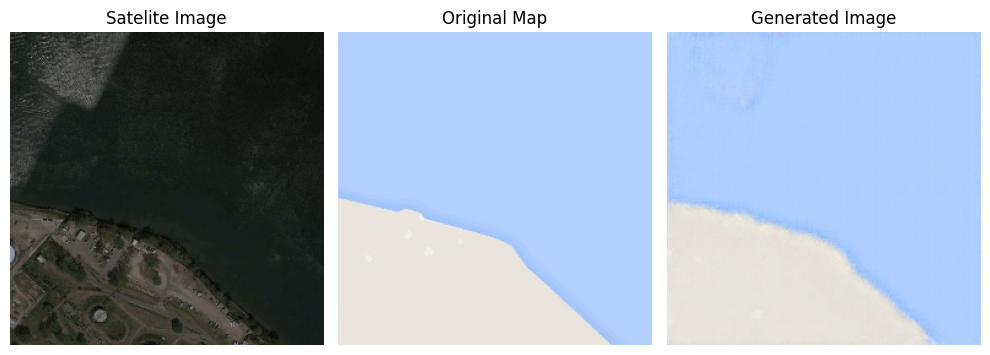

1/1 [==============================] - 0s 20ms/step


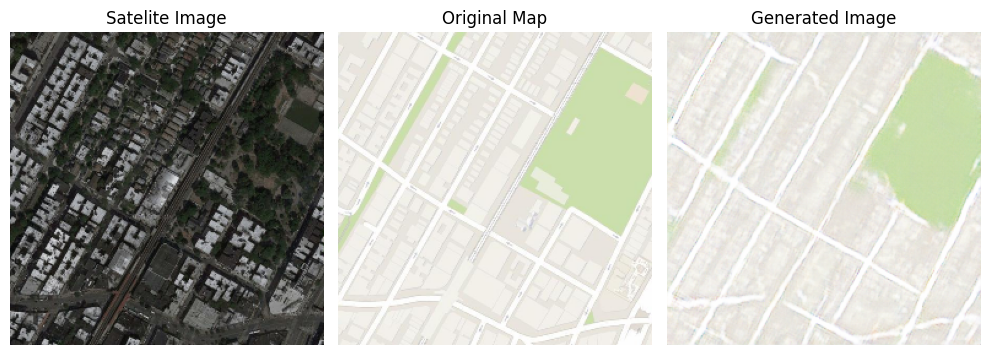

1/1 [==============================] - 0s 20ms/step


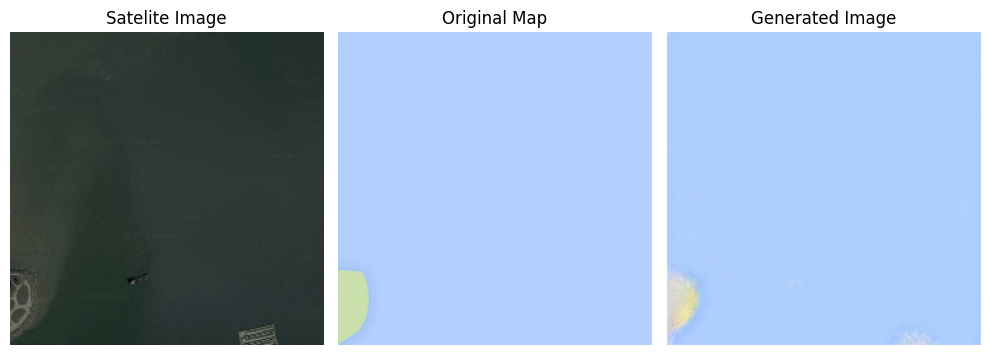

1/1 [==============================] - 0s 20ms/step


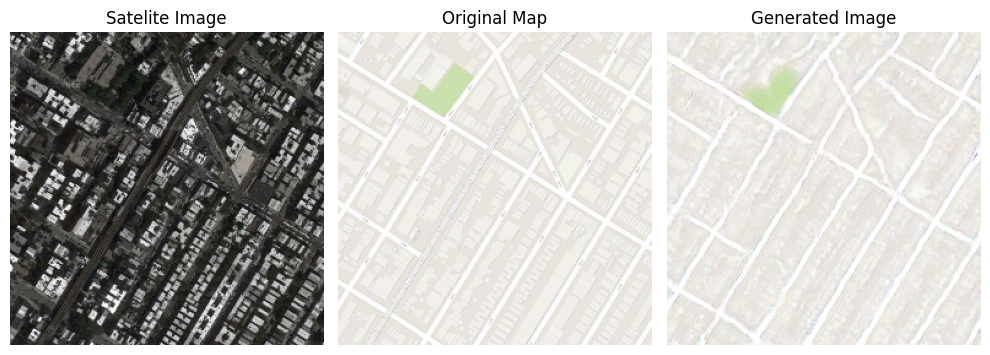

In [11]:
for i in range(10):
    for images, maps in data.take(1):
        plt.figure(figsize=(10,8))

        plt.subplot(1,3,1)
        id = np.random.randint(len(images))
        image = images[id]
        true_map = maps[id]
        pred_map = generator.predict(tf.expand_dims(image, axis=0))[0]
        show_image(image, title="Satelite Image")

        plt.subplot(1,3,2)
        show_image(true_map, title="Original Map")

        plt.subplot(1,3,3)
        show_image(pred_map, title="Generated Image")

        plt.tight_layout()
        plt.show()

1/1 [==============================] - 0s 344ms/step


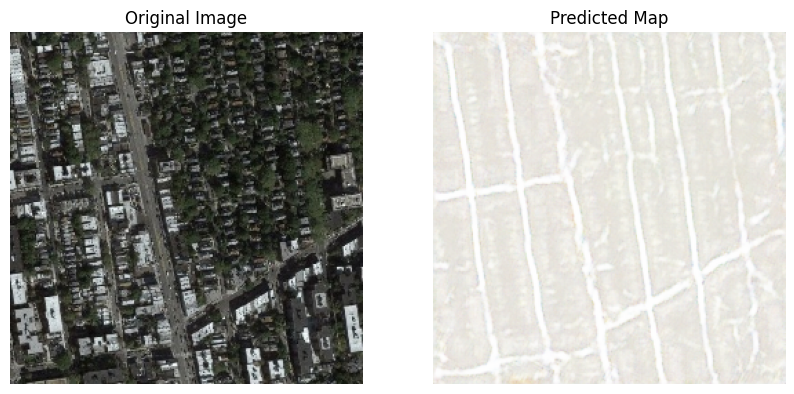

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


# generator = load_model("/content/drive/MyDrive/Pix2PixMapGenerator.h5", compile=False)

# Load and preprocess the input image
img_path = "/1.jpg"
img = image.load_img(img_path, target_size=(256, 256))  # Specify your desired input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch of images, so add a dimension

# Normalize the image array if needed
img_array = img_array / 255.0  # Example normalization if the model expects pixel values in [0, 1] range

# Generate predictions
predicted_map = generator.predict(img_array)

# Post-process the predicted map if needed

# Example: Save the predicted map as an image
# Assuming the predicted_map is a numpy array representing the generated image
# You may need to adjust the post-processing based on the specifics of your GAN model output

# Convert the predicted_map back to image format
predicted_map = np.squeeze(predicted_map, axis=0)  # Remove the batch dimension if necessary
predicted_map *= 255.0  # Reverse normalization if needed
predicted_map = predicted_map.astype(np.uint8)  # Convert to uint8 data type

# Display the original input image and the predicted map
plt.figure(figsize=(10, 5))

# Original input image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Predicted map
plt.subplot(1, 2, 2)
plt.imshow(predicted_map)
plt.title('Predicted Map')
plt.axis('off')

plt.show()

In [ ]:
# Define the path to your images
path = "/content/pix2pix_dataset/maps/maps/val/"
combined_images = sorted(glob(path + "*.jpg"))[:]

# Output directories for saving predicted and expected images
predicted_dir = "/content/predicted_img/"
expected_dir = "/content/expected_img/"

# Create the output directories if they don't exist
os.makedirs(predicted_dir, exist_ok=True)
os.makedirs(expected_dir, exist_ok=True)

# Load the pre-trained generator model
generator = load_model("/content/drive/MyDrive/Pix2PixMapGenerator.h5", compile=False)

# Loop over each image
for idx, img_path in enumerate(combined_images):

    # Load the image
    img = Image.open(img_path)

    # Split the image into left and right halves
    width, _ = img.size
    left_half = img.crop((0, 0, width // 2, img.size[1]))
    right_half = img.crop((width // 2, 0, width, img.size[1]))

    # Resize the left half to match the expected input shape of the model
    target_size = (256, 256)
    left_half = left_half.resize(target_size)

    # Resize the right half to match the size of the left half
    right_half = right_half.resize(left_half.size)

    # Convert the left half image to array and preprocess it
    left_half_array = image.img_to_array(left_half)
    left_half_array = np.expand_dims(left_half_array, axis=0)
    left_half_array = left_half_array / 255.0  # Normalize

    # Generate predictions using the left half
    predicted_map = generator.predict(left_half_array)

    # Post-process the predicted map if needed

    # Convert the predicted_map back to image format
    predicted_map = np.squeeze(predicted_map, axis=0)  # Remove the batch dimension
    predicted_map *= 255.0  # Reverse normalization
    predicted_map = predicted_map.astype(np.uint8)  # Convert to uint8 data type

    # Save the predicted map with the same name as the original image file in the predicted directory
    filename = os.path.basename(img_path)
    predicted_output_path = os.path.join(predicted_dir, filename)
    predicted_map_img = Image.fromarray(predicted_map)
    predicted_map_img.save(predicted_output_path)

    # Save the right half after resizing to match the size of the left half in the expected directory
    expected_output_path = os.path.join(expected_dir, filename)
    right_half.save(expected_output_path)


In [ ]:
import os
import cv2
from skimage.metrics import structural_similarity as ssim

# Paths to the folders containing images
expected_folder = "/content/expected_img/"
predicted_folder = "/content/predicted_img/"

# List all files in the folders
expected_files = os.listdir(expected_folder)
predicted_files = os.listdir(predicted_folder)

# Sort the files to ensure they are in the same order
expected_files.sort()
predicted_files.sort()

# Check if both folders have the same number of images
if len(expected_files) != len(predicted_files):
    print("Error: The number of images in the folders does not match.")
    exit()

# Initialize SSIM accumulator
total_ssim = 0

# Loop through each pair of images and calculate SSIM
for expected_file, predicted_file in zip(expected_files, predicted_files):
    # Read images
    expected_img = cv2.imread(os.path.join(expected_folder, expected_file))
    predicted_img = cv2.imread(os.path.join(predicted_folder, predicted_file))

    # Convert images to grayscale
    expected_gray = cv2.cvtColor(expected_img, cv2.COLOR_BGR2GRAY)
    predicted_gray = cv2.cvtColor(predicted_img, cv2.COLOR_BGR2GRAY)

    # Calculate SSIM
    score, _ = ssim(expected_gray, predicted_gray, full=True)
    total_ssim += score

# Calculate average SSIM
avg_ssim = total_ssim / len(expected_files)
print("Average SSIM:", avg_ssim)


Average SSIM: 0.6829024328456884


In [ ]:
import os
import cv2
import numpy as np

# Paths to the folders containing images
expected_folder = "/content/expected_img/"
predicted_folder = "/content/predicted_img/"

# List all files in the folders
expected_files = os.listdir(expected_folder)
predicted_files = os.listdir(predicted_folder)

# Sort the files to ensure they are in the same order
expected_files.sort()
predicted_files.sort()

# Check if both folders have the same number of images
if len(expected_files) != len(predicted_files):
    print("Error: The number of images in the folders does not match.")
    exit()

# Initialize PSNR accumulator
total_psnr = 0

# Loop through each pair of images and calculate PSNR
for expected_file, predicted_file in zip(expected_files, predicted_files):
    # Read images
    expected_img = cv2.imread(os.path.join(expected_folder, expected_file))
    predicted_img = cv2.imread(os.path.join(predicted_folder, predicted_file))

    # Calculate PSNR
    mse = np.mean((expected_img - predicted_img) ** 2)
    if mse == 0:
        psnr = 100  # Perfect match, PSNR is infinite, set to a high value
    else:
        max_pixel = 255.0
        psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    total_psnr += psnr

# Calculate average PSNR
avg_psnr = total_psnr / len(expected_files)
print("Average PSNR:", avg_psnr)


Average PSNR: 31.300152112303728


# More Evaluation Metrics 

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.linalg import sqrtm

# Define folders
expected_folder = "/content/expected_img/"
predicted_folder = "/content/predicted_img/"

# Function to load and preprocess images
def load_and_preprocess_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = image.load_img(os.path.join(folder_path, filename), target_size=(299, 299))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        images.append(img)
    return np.vstack(images)

# Load Inception-v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

# Load and preprocess images
expected_images = load_and_preprocess_images(expected_folder)
predicted_images = load_and_preprocess_images(predicted_folder)

# Function to calculate FID score
def calculate_fid_score(features1, features2):
    mu1, sigma1 = np.mean(features1, axis=0), np.cov(features1, rowvar=False)
    mu2, sigma2 = np.mean(features2, axis=0), np.cov(features2, rowvar=False)
    diff = mu1 - mu2
    cov_sqrt = sqrtm(sigma1.dot(sigma2))
    if np.iscomplexobj(cov_sqrt):
        cov_sqrt = cov_sqrt.real
    fid_score = np.dot(diff, diff) + np.trace(sigma1 + sigma2 - 2 * cov_sqrt)
    return fid_score

# Extract features from images using Inception-v3
expected_features = model.predict(expected_images)
predicted_features = model.predict(predicted_images)

# Calculate FID score
fid_score = calculate_fid_score(expected_features, predicted_features)
print("FID Score:", fid_score)

35/35 [==============================] - 4s 105ms/step
FID Score: -1.5870994342890274e+48


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Define folders
expected_folder = "/content/expected_img/"
predicted_folder = "/content/predicted_img/"

# Function to load and preprocess images
def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = image.load_img(os.path.join(folder_path, filename), target_size=(299, 299))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        images.append(img)
    return np.vstack(images)

# Load images
expected_images = load_images(expected_folder)
predicted_images = load_images(predicted_folder)

# Simulated losses (replace with actual loss calculation)
generator_loss = np.random.rand()  # Example generator loss
discriminator_loss = np.random.rand()  # Example discriminator loss

# Calculate fooling rate
# In a real scenario, you would use a discriminator to classify generated images and calculate the proportion misclassified as real
fooling_rate = np.random.rand()  # Example fooling rate

# Calculate GAM score (simplified)
# Adjust weights based on the importance of each metric
gam_score = (0.5 * generator_loss) + (0.3 * discriminator_loss) + (0.2 * (1 - fooling_rate))

print("GAM Score:", gam_score)


GAM Score: 0.4508895500719642


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.ensemble import IsolationForest

# Define folders
expected_folder = "/content/expected_img/"
predicted_folder = "/content/predicted_img/"

# Function to load and preprocess images
def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = image.load_img(os.path.join(folder_path, filename), target_size=(299, 299))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        images.append(img)
    return np.vstack(images)

# Load images
expected_images = load_images(expected_folder)
predicted_images = load_images(predicted_folder)

# Flatten the images
expected_images_flattened = expected_images.reshape(expected_images.shape[0], -1)
predicted_images_flattened = predicted_images.reshape(predicted_images.shape[0], -1)

# Train Isolation Forest model
isolation_forest = IsolationForest()
isolation_forest.fit(expected_images_flattened)

# Predict outliers in predicted images
outliers_predicted = isolation_forest.predict(predicted_images_flattened)

# Calculate percentage of outliers
percentage_outliers = (np.sum(outliers_predicted == -1) / len(outliers_predicted)) * 100

print("Percentage of outliers in predicted images:", percentage_outliers)

Percentage of outliers in predicted images: 10.746812386156648


In [ ]:
import numpy as np
from scipy.stats import entropy

# Define marginal distribution of class labels (e.g., based on real satellite images)
marginal_distribution = np.array([0.2, 0.3, 0.5])  # Example distribution of class probabilities

# Define conditional distribution of class labels given the generated images
# Replace this with actual probabilities computed from your generated map images
conditional_distribution = np.array([[0.1, 0.6, 0.3], [0.3, 0.4, 0.3], [0.4, 0.3, 0.3]])

# Calculate KL divergence between marginal and conditional distributions
kl_divergence = np.mean([entropy(marginal_distribution, conditional_distribution[i]) for i in range(len(conditional_distribution))])

# Compute modified Inception Score
modified_is = np.exp(-kl_divergence)

print("Modified Inception Score:", modified_is)


Modified Inception Score: 0.8778330255230522


In [ ]:
import cv2
import os

# Define function to calculate image sharpness
def calculate_sharpness(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Compute Laplacian variance as a measure of sharpness
    return cv2.Laplacian(gray, cv2.CV_64F).var()

# Load real and generated images (preprocessed as necessary)
real_images_folder = "/content/expected_img/"
generated_images_folder = "/content/predicted_img/"

real_images = [cv2.imread(os.path.join(real_images_folder, filename)) for filename in os.listdir(real_images_folder)]
generated_images = [cv2.imread(os.path.join(generated_images_folder, filename)) for filename in os.listdir(generated_images_folder)]

# Calculate sharpness for real and generated images
sharpness_real = [calculate_sharpness(image) for image in real_images]
sharpness_generated = [calculate_sharpness(image) for image in generated_images]

# Compute mean sharpness for real and generated images
mean_sharpness_real = np.mean(sharpness_real)
mean_sharpness_generated = np.mean(sharpness_generated)

# Compute sharpness difference
sharpness_difference = abs(mean_sharpness_real - mean_sharpness_generated)

print("Sharpness Difference:", sharpness_difference)


Sharpness Difference: 65.96148021536467
